In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_density = pd.read_csv("data/density.csv")
df_employment = pd.read_csv("data/employment.csv")

# merge the tables
df = pd.merge(df_density, df_employment,
                      left_on='Country (or dependent territory)', right_on='Country')
# split israel & india
df_test = df[(df.Country == 'India') | (df.Country == 'Israel')]
df = df[(df.Country != 'Israel') & (df.Country != 'India')]

# create numpy arrays x, y
density = np.array(df['Density (pop./km2)'], dtype=np.float64)
employment = np.array(df['Employment rate (%)'])

In [11]:
def linear_regression(x, y):
    n = len(y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(np.power(x, 2))
    sum_xy = np.sum(x*y)
    a = (sum_y*sum_x2 - sum_x*sum_xy) / (n*sum_x2 - sum_x*sum_x)
    b = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x*sum_x)
    return a, b

def predict(func, a, b, x):
    a, b = func(a, b)
    return b*x + a

In [12]:
# calculate the slope and intercept
a, b = linear_regression(density,employment)
print('slope ', b, 'intercept ', a)

slope  0.00269661338916 intercept  65.9288231042


In [14]:
# correlation
corr = np.corrcoef(density, employment)
print('corr', corr[0][1])

corr 0.0323170006857


In [16]:
# prediction results for Israel, India
predict_x = []
predict_y = []

# Predict the employment rate of Israel, India
for lab, row in df_test.iterrows():
    result = []
    x = float(row['Density (pop./km2)'])
    y = predict(linear_regression, density, employment, x)
    result.append(row.Country)
    predict_x.append(x)
    predict_y.append(y)
    print(row.Country, 'rate employment ', y)

India rate employment  67.0155583001
Israel rate employment  67.0047718465


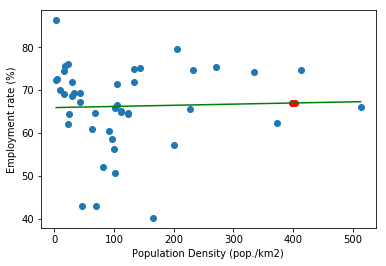

In [17]:
# scatter plot
plt.scatter(density, employment)
# add Israel, India
plt.scatter(predict_x, predict_y, color='red')
# regression line
fit = np.polyfit(density, employment, deg=1)
plt.plot(density, fit[0] * density + fit[1], color='green')
plt.xlabel('Population Density (pop./km2)')
plt.ylabel('Employment rate (%)')
plt.show()